In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
movies = pd.read_csv('movies_genres.csv')

In [6]:
movies.shape

(9742, 22)

In [7]:
movies.head()

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
0,1,Toy Story,1995.0,0,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
1,2,Jumanji,1995.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Waiting to Exhale,1995.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,Father of the Bride Part II,1995.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Scale or drop for pca

In [8]:
X = movies.drop(columns=['title','year','movieid'])
X

,romance,sci-fi,animation,film-noir,musical,adventure,thriller,horror,documentary,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
9738,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9740,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


return 0.85 of the feature

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)

In [10]:
X_hat = pca.fit_transform(X)
X_hat

array([[ 1.07239752,  0.31805779,  0.91184282, ...,  0.21943338,
         0.24225473,  0.0060842 ],
       [ 0.29466238,  0.52972112,  0.94513582, ...,  0.16857683,
        -0.21899785,  0.30786555],
       [ 0.82594084, -0.43446627, -0.20090153, ..., -0.06049406,
        -0.01780112, -0.02611566],
       ...,
       [-0.54402065, -0.4085315 ,  0.17526324, ..., -0.02266916,
         0.00633983,  0.0057951 ],
       [ 0.0720776 ,  0.67973277,  0.43665374, ...,  0.16370268,
         0.712788  , -0.32667218],
       [ 0.75623436, -0.11883799, -0.24079759, ..., -0.11079494,
        -0.03117497,  0.06571303]])

#### Variance explained by each of the components

In [11]:
pca.explained_variance_ratio_.shape

(11,)

In [12]:
pca.explained_variance_ratio_

array([0.19114012, 0.16388595, 0.09998901, 0.0853231 , 0.07032192,
       0.06027131, 0.05514299, 0.0409169 , 0.03925734, 0.03569256,
       0.03232829])

#### Plot in 2D

In [13]:
component_no = np.arange(1, X_hat.shape[1]+1)

Text(0, 0.5, 'explained variance [%]')

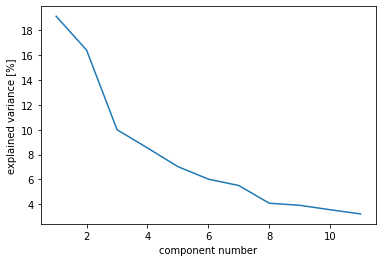

In [14]:
plt.plot(component_no, pca.explained_variance_ratio_*100 )
plt.xlabel("component number")
plt.ylabel("explained variance [%]")

Text(0, 0.5, 'explained variance [%]')

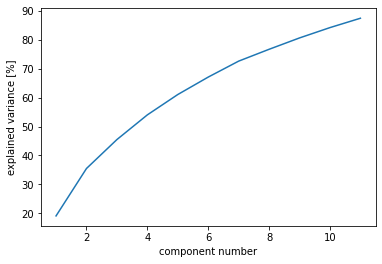

In [15]:
plt.plot(component_no, np.cumsum(pca.explained_variance_ratio_*100) )
plt.xlabel("component number")
plt.ylabel("explained variance [%]")

(-3.5, 3.5)

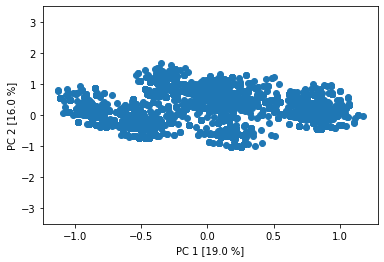

In [16]:
plt.scatter(X_hat[:,0],X_hat[:,1])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[0],2)*100} %]')
plt.ylabel(f'PC 2 [{round(pca.explained_variance_ratio_[1],2)*100} %]')
plt.ylim(-3.5,3.5)

(-3.5, 3.5)

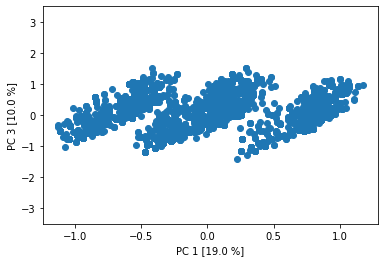

In [17]:
plt.scatter(X_hat[:,0],X_hat[:,2])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[0],2)*100} %]')
plt.ylabel(f'PC 3 [{round(pca.explained_variance_ratio_[2],2)*100} %]')
plt.ylim(-3.5,3.5)

#### Biplot
- No inherent biplot function in scikit PCA, but plenty of implementations out there, like this one: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

- Another options is the pca package (!pip install pca)

In [18]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'b', alpha = 0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

### 3. Plot in 2D to visualize the distribution of genres

In [19]:
pca.components_

array([[ 0.06970648, -0.0111774 ,  0.08234656, -0.01393064,  0.03145166,
         0.06588691, -0.29322992, -0.02865135,  0.01444727,  0.05775939,
        -0.07776281,  0.11017031,  0.69538858, -0.13274171, -0.00101474,
         0.00132962, -0.04546997, -0.60486642, -0.07111473],
       [-0.31562828,  0.23239823,  0.06860272,  0.00260364, -0.02425531,
         0.24159172,  0.3547117 ,  0.17108379,  0.02211406,  0.07999996,
         0.05374469,  0.04670137, -0.28026606,  0.0906278 ,  0.00577704,
         0.0365239 , -0.02092037, -0.56995957,  0.44970198],
       [ 0.03989606,  0.13690749,  0.1966953 , -0.01735913,  0.03198779,
         0.51413993, -0.50312732, -0.25627132, -0.00488217,  0.22854953,
        -0.14108735,  0.21325565, -0.2299883 , -0.28675747,  0.01366049,
         0.04622103,  0.06246491,  0.18607253,  0.25076773],
       [ 0.17980967, -0.04257694, -0.06703334,  0.00419657, -0.03899849,
         0.13676234,  0.18545264, -0.3153625 , -0.17627763, -0.04687901,
        -0.013

In [20]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.069706,-0.011177,0.082347,-0.013931,0.031452,0.065887,-0.293230,-0.028651,0.014447,0.057759,-0.077763,0.110170,0.695389,-0.132742,-0.001015,0.001330,-0.045470,-0.604866,-0.071115
1,-0.315628,0.232398,0.068603,0.002604,-0.024255,0.241592,0.354712,0.171084,0.022114,0.080000,0.053745,0.046701,-0.280266,0.090628,0.005777,0.036524,-0.020920,-0.569960,0.449702
2,0.039896,0.136907,0.196695,-0.017359,0.031988,0.514140,-0.503127,-0.256271,-0.004882,0.228550,-0.141087,0.213256,-0.229988,-0.286757,0.013660,0.046221,0.062465,0.186073,0.250768
3,0.179810,-0.042577,-0.067033,0.004197,-0.038998,0.136762,0.185453,-0.315362,-0.176278,-0.046879,-0.013277,-0.082177,0.425767,0.413531,-0.006570,0.007485,0.022226,0.255904,0.590514
4,0.877146,0.175665,-0.062846,-0.008369,0.012226,0.048747,0.212662,0.152791,-0.055698,0.060754,0.048007,-0.102344,-0.139567,-0.246038,-0.002321,0.010593,-0.020813,-0.146581,0.054938
5,0.054599,-0.201635,0.291781,0.017867,0.064983,0.354499,0.405680,-0.025276,-0.142800,0.361863,0.190915,0.412341,0.086135,0.188571,-0.018286,0.007507,-0.088177,0.088752,-0.398707
6,-0.257081,0.414965,-0.059382,-0.029203,-0.053566,0.105515,0.242494,0.333664,-0.244960,0.031963,0.031568,-0.053183,0.374853,-0.494127,-0.018904,0.008990,0.010149,0.350221,0.021731
7,0.065608,0.770379,0.132155,0.026065,0.007365,-0.080672,-0.216598,-0.030059,-0.095199,-0.050176,0.066876,0.051095,-0.013207,0.485015,-0.025249,0.022153,-0.135780,0.018803,-0.235990
8,0.050301,-0.193845,0.046637,-0.005917,0.001570,-0.173332,-0.339292,0.668565,-0.202612,0.440573,-0.004851,0.016350,0.004220,0.259522,-0.012379,0.002206,-0.013240,0.092346,0.232081
9,0.013374,0.076126,0.474508,-0.011850,0.129956,-0.658727,0.129266,-0.219708,-0.049413,0.111766,-0.010206,0.345882,-0.013256,-0.225191,-0.025497,0.011952,0.018937,0.024259,0.256199


<AxesSubplot:>

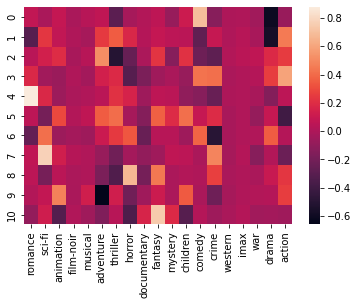

In [21]:
sns.heatmap(pca.components_,xticklabels=X.columns[:])

In [22]:
pca.components_[0]

array([ 0.06970648, -0.0111774 ,  0.08234656, -0.01393064,  0.03145166,
        0.06588691, -0.29322992, -0.02865135,  0.01444727,  0.05775939,
       -0.07776281,  0.11017031,  0.69538858, -0.13274171, -0.00101474,
        0.00132962, -0.04546997, -0.60486642, -0.07111473])

In [23]:
X.columns

Index(['romance', 'sci-fi', 'animation', 'film-noir', 'musical', 'adventure',
       'thriller', 'horror', 'documentary', 'fantasy', 'mystery', 'children',
       'comedy', 'crime', 'western', 'imax', 'war', 'drama', 'action'],
      dtype='object')

In [24]:
movies['pc1'] = X_hat[:,0]
movies['pc2'] = X_hat[:,1]

Text(0.5, 1.0, 'Thriller dist among classes')

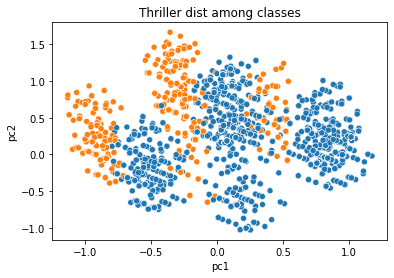

In [25]:
sns.scatterplot(data = movies, x = 'pc1', y = 'pc2', hue = 'thriller', legend = False)
plt.title('Thriller dist among classes')

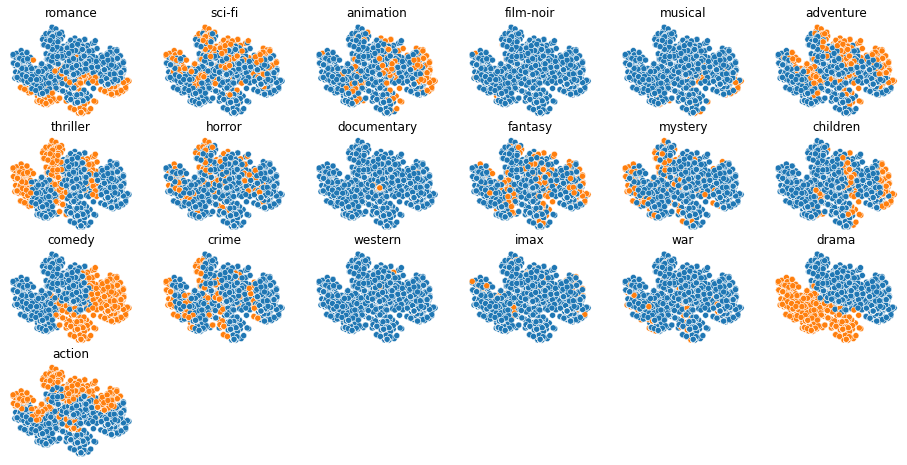

In [26]:
genre = X.columns[:]
plt.figure(figsize= (16,8))
for i, genre in zip(np.arange(1,len(genre)+1), X.columns[:]):
    plt.subplot(4,6,i)
    sns.scatterplot(data = movies, x = 'pc1', y = 'pc2', hue = X[genre], legend = False)
    sns.despine()
    plt.title(genre)
    plt.axis('off')

Text(0.5, 1.0, 'Biplot of PCA with ingredients')

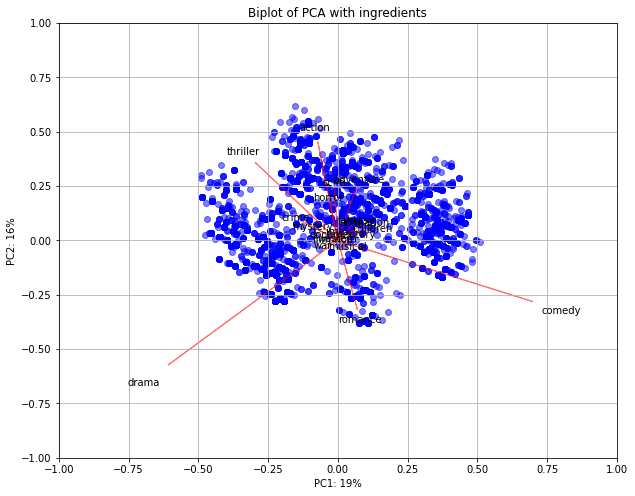

In [27]:
plt.figure(figsize = (10, 8))
#Call the function with the first two PC
biplot(X_hat[:,0:2],np.transpose(pca.components_[0:2, :]), labels = X.columns)
plt.xlabel("PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
plt.ylabel("PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
plt.title("Biplot of PCA with ingredients")

K-means for clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
X_hat.shape

(9742, 11)

In [36]:
inertia = []
silhoutte = []

for cluster_no in range (20, 50):
    clustering = KMeans(n_clusters= cluster_no)
    clustering.fit(X_hat[:,:])
    inertia.append(clustering.inertia_)
    silhoutte.append(silhouette_score(X_hat[:,:], clustering.labels_))

Text(0.5, 1.0, 'Inertia')

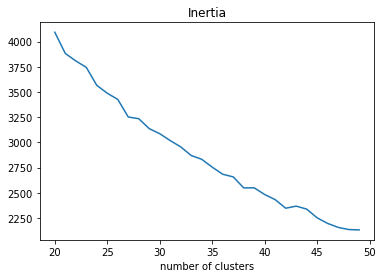

In [37]:
clusters = np.arange(20,50)
plt.plot(clusters, inertia)
plt.xlabel('number of clusters')
plt.title('Inertia')

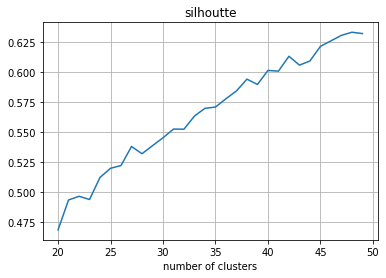

In [38]:
clusters = np.arange(20,50)
plt.plot(clusters, silhoutte)
plt.xlabel('number of clusters')
plt.title('silhoutte')
plt.grid()

In [39]:
clustering = KMeans(n_clusters= 33)

In [41]:
clustering.fit(X_hat[:,:])

KMeans(n_clusters=33)

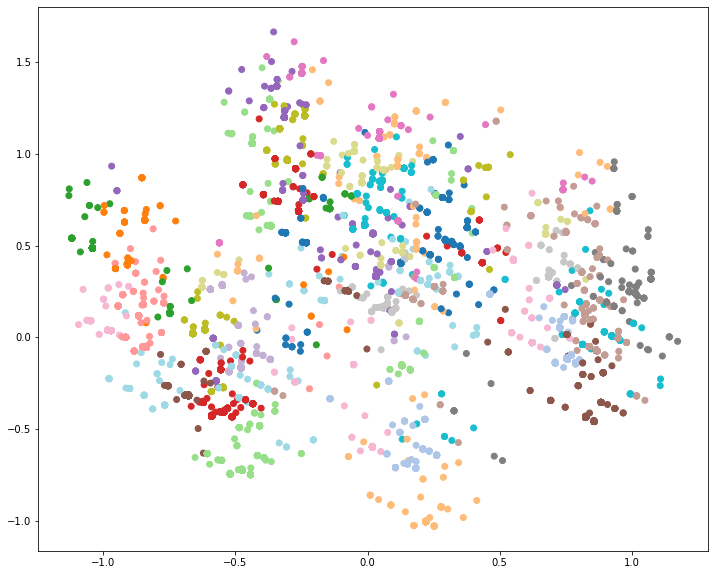

In [43]:
plt.figure(figsize = (12,10))
plt.scatter(X_hat[:,0], X_hat[:,1], c = clustering.labels_, cmap = 'tab20')

In [44]:
from sklearn.manifold import TSNE

In [45]:
tsne = TSNE(n_components= 2) 

In [46]:
T = tsne.fit_transform(X_hat[:,:]) 

/home/mastafil/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mastafil/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [47]:
movies['tsne_1'] = T[:,0]
movies['tsne_2'] = T[:,1]

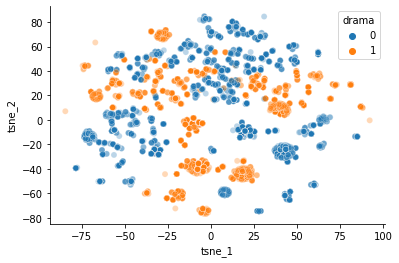

In [48]:
sns.scatterplot(data = movies, x = 'tsne_1', y = 'tsne_2',hue = 'drama', legend = True, alpha = 0.3)
sns.despine()

In [49]:
movies['cluster_no'] = clustering.labels_

In [50]:
movies['cluster_no'] = movies['cluster_no'].astype(str)

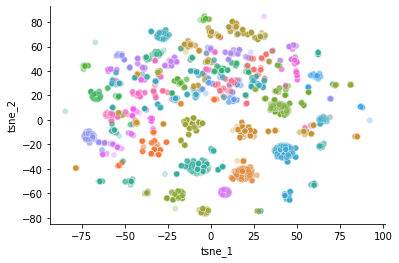

In [51]:
sns.scatterplot(data = movies, x = 'tsne_1', y = 'tsne_2', hue = 'cluster_no', legend = False, alpha = 0.3)
sns.despine()

In [53]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [54]:
fig = px.scatter(movies, 
                 x="tsne_1", 
                 y="tsne_2", 
                 color="cluster_no", 
                 hover_data=['title'],
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(showlegend=False)
fig.show()

In [55]:
movies.head()

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,western,imax,war,drama,action,pc1,pc2,tsne_1,tsne_2,cluster_no
0,1,Toy Story,1995.0,0,0,1,0,0,1,0,...,0,0,0,0,0,1.072398,0.318058,12.043888,31.898932,23
1,2,Jumanji,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.294662,0.529721,25.019049,41.152977,0
2,3,Grumpier Old Men,1995.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.825941,-0.434466,-31.298958,-22.179134,16
3,4,Waiting to Exhale,1995.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.221074,-1.004426,23.915854,-41.159698,6
4,5,Father of the Bride Part II,1995.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.756234,-0.118838,19.774000,-6.547913,3


In [56]:
movies.to_csv('movies_clusters.csv')